In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import (
    cross_val_score, KFold
)
from utils.paths import DATA_RAW_DIR

In [2]:
path_happiness = str(DATA_RAW_DIR / "happiness.csv")
print(Path(path_happiness).exists())
df_happiness = pd.read_csv(path_happiness, sep=",", encoding="utf-8")
df_happiness.head()

True


,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
df_happiness.columns

Index(['country', 'rank', 'score', 'high', 'low', 'gdp', 'family', 'lifexp',
       'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [5]:
X = df_happiness.drop(columns=["country", "score"], axis=1)
y = df_happiness["score"]

In [6]:
# decision tree regressor
model_dt = DecisionTreeRegressor()
# cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)
# cross-validation scores
scores = cross_val_score(model_dt, X, y, cv=cv, scoring="neg_mean_squared_error")
# convert scores to positive
scores = -scores
# print scores
print("Cross-validation scores:", scores)
# print mean and standard deviation of scores
print("Mean score:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))

Cross-validation scores: [0.0099865  0.00646712 0.00458353]
Mean score: 0.007012382022080291
Standard deviation of scores: 0.002239198254660346


In [7]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_dt.fit(X_train, y_train)
    score = model_dt.score(X_test, y_test)
    print("Test score:", score)

Test score: 0.9945392820969601
Test score: 0.9941026006022765
Test score: 0.9969124305596853


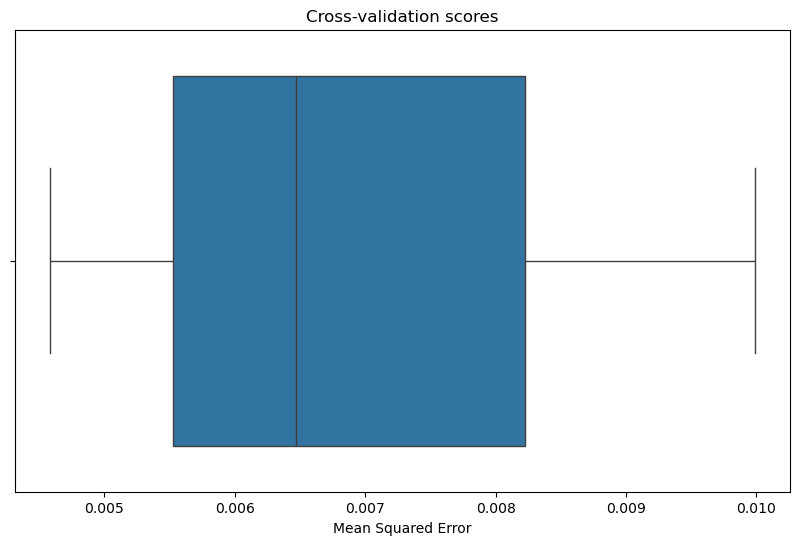

In [8]:
# visualization of cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(data=scores, orient="h")
plt.title("Cross-validation scores")
plt.xlabel("Mean Squared Error")
plt.show()